In [1]:
###############################################
#                                             #
#　テキストマイニング総合パッケージ （ver.2.0）　 　  #
#　　　　　    by Y.Maeda　　   　               #
#　　　created :       2001/05/28 　           # 
#     last modified : 2001/07/12 　           #
#                                             #
###############################################

import pandas as pd
import numpy as np
import MeCab
from wordcloud import WordCloud

import itertools
import collections
from collections import Counter
import re
import subprocess

import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline 
import japanize_matplotlib

import GeneralTextMining2 as TM2

In [2]:
##############################
#
#    テキストマイニング
#
##############################



In [2]:
F_text = '「イノベーション」とは、モノや仕組み、サービス、組織、\
ビジネスモデルなどに新たな考え方や技術を取り入れて新たな価値を生み出し、\
社会にインパクトのある革新や刷新、変革をもたらすことを意味する。HR領域においても、\
組織づくりと密接な関係にあるため、「イノベーション」に対する関心が集まっている。\
「イノベーション」とは、モノや仕組み、サービス、組織、ビジネスモデルなどに新たな考え方や\
技術を取り入れて新たな価値を生み出し、社会にインパクトのある革新や刷新、変革をもたらすことを意味する。\
現在の企業にとって、イノベーションを成功させられる組織であるかどうかは非常に重要な経営課題だ。\
ところが、「イノベーション」という言葉の意味を考えた時、「何か新しいことに挑戦すること」、\
「停滞した状態から変革をおこすこと」といったような、なんとなく、\
ぼんやりとしたイメージで使用していないだろうか。まずは正しい概念を理解するために、\
大前提として、「イノベーション」の言葉の意味と定義から確認していこう。'



In [3]:
##############################
#
#    テキスト解析（頻出単語の抽出）
#
##############################
            
m = MeCab.Tagger('-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd \
    -u /usr/local/lib/mecab/dic/userdic/add.dic')

exwords=()
inPOSs=['名詞','英単語']
解析テキスト=F_text

#　データの前処理
前処理後テキスト = TM2.Webテキスト前処理3(解析テキスト,m,psw=False)[0]    
# テキスト分析
result = TM2.テキスト分析(前処理後テキスト,exwords,inPOSs,m)
c = collections.Counter(result)
print(c.most_common(100))


[('イノベーション', 5), ('意味', 3), ('組織', 2), ('新た', 2), ('変革', 2), ('言葉', 2), ('モノ', 1), ('仕組み', 1), ('サービス', 1), ('ビジネスモデル', 1), ('考え方', 1), ('技術', 1), ('価値', 1), ('社会', 1), ('インパクト', 1), ('革新', 1), ('刷新', 1), ('HR領域', 1), ('組織づくり', 1), ('密接', 1), ('関係', 1), ('関心', 1), ('現在', 1), ('企業', 1), ('成功', 1), ('非常', 1), ('重要', 1), ('経営課題', 1), ('挑戦', 1), ('停滞', 1), ('状態', 1), ('ぼんやり', 1), ('イメージ', 1), ('使用', 1), ('概念', 1), ('理解', 1), ('大前提', 1), ('定義', 1), ('確認', 1)]


In [5]:
#######################################
#
#    テキスト解析（頻出単語の抽出）
#    ＜＜＜キーワードでスクリーニング＞＞＞
#
#######################################

m = MeCab.Tagger('-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd \
    -u /usr/local/lib/mecab/dic/userdic/add.dic')

exwords=()
ADict = {'イノベーション':['イノベーション','R&D','技術','開発','研究']}
キーワード =ADict['イノベーション']
print('キーワード：',キーワード,'\n')

解析テキスト=F_text
解析文 = TM2.Webテキスト前処理3(解析テキスト,m,psw=False)[1]
# キーワードを含む文を抽出
抽出結果=TM2.keywordEx2(解析文,キーワード,psw=False)
抽出テキスト=抽出結果[0]

#　テキスト解析
inPOSs=['名詞','英単語']
result = TM2.テキスト分析(抽出テキスト,exwords,inPOSs,m)
c = collections.Counter(result)
print(c.most_common(100))

キーワード： ['イノベーション', 'R&D', '技術', '開発', '研究'] 

[('イノベーション', 5), ('意味', 3), ('組織', 2), ('新た', 2), ('変革', 2), ('言葉', 2), ('モノ', 1), ('仕組み', 1), ('サービス', 1), ('ビジネスモデル', 1), ('考え方', 1), ('技術', 1), ('価値', 1), ('社会', 1), ('インパクト', 1), ('革新', 1), ('刷新', 1), ('HR領域', 1), ('組織づくり', 1), ('密接', 1), ('関係', 1), ('関心', 1), ('現在', 1), ('企業', 1), ('成功', 1), ('非常', 1), ('重要', 1), ('経営課題', 1), ('挑戦', 1), ('停滞', 1), ('状態', 1), ('ぼんやり', 1), ('イメージ', 1), ('使用', 1), ('概念', 1), ('理解', 1), ('大前提', 1), ('定義', 1), ('確認', 1)]


In [6]:
#################################################
#
#　　　共起分析
#
#################################################

m = MeCab.Tagger('-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd \
    -u /usr/local/lib/mecab/dic/userdic/add.dic')

exwords=()

解析テキスト=F_text
解析テキスト = TM2.Webテキスト前処理3(解析テキスト,m,psw=False)[0]

#　共起分析
inPOSs=['名詞','形容詞','英単語']
cnt_pairs1=TM2.共起分析2(解析テキスト,exwords,inPOSs,m,psw=False)
print('前出を後出を区別しない時')
print(cnt_pairs1.most_common(50))

print('\n前出を後出を区別する時')
cnt_pairs2=TM2.共起分析2(解析テキスト,exwords,inPOSs,m,order=True,psw=False)
print(cnt_pairs2.most_common(50))

前出を後出を区別しない時
[(('イノベーション', '意味'), 3), (('イノベーション', '組織'), 2), (('イノベーション', '新た'), 2), (('イノベーション', '変革'), 2), (('モノ', '新た'), 2), (('仕組み', '新た'), 2), (('サービス', '新た'), 2), (('新た', '組織'), 2), (('ビジネスモデル', '新た'), 2), (('新た', '考え方'), 2), (('技術', '新た'), 2), (('価値', '新た'), 2), (('新た', '社会'), 2), (('インパクト', '新た'), 2), (('新た', '革新'), 2), (('刷新', '新た'), 2), (('変革', '新た'), 2), (('意味', '新た'), 2), (('変革', '意味'), 2), (('イノベーション', '言葉'), 2), (('意味', '言葉'), 2), (('イノベーション', 'モノ'), 1), (('イノベーション', '仕組み'), 1), (('イノベーション', 'サービス'), 1), (('イノベーション', 'ビジネスモデル'), 1), (('イノベーション', '考え方'), 1), (('イノベーション', '技術'), 1), (('イノベーション', '価値'), 1), (('イノベーション', '社会'), 1), (('イノベーション', 'インパクト'), 1), (('イノベーション', '革新'), 1), (('イノベーション', '刷新'), 1), (('モノ', '仕組み'), 1), (('サービス', 'モノ'), 1), (('モノ', '組織'), 1), (('ビジネスモデル', 'モノ'), 1), (('モノ', '考え方'), 1), (('モノ', '技術'), 1), (('モノ', '価値'), 1), (('モノ', '社会'), 1), (('インパクト', 'モノ'), 1), (('モノ', '革新'), 1), (('モノ', '刷新'), 1), (('モノ', '変革'), 1), (('モノ', '意味'), 1), (('サービス', '仕組み'

In [7]:
#################################################
#
#　　　共起分析（キーワードで抽出）
#
#################################################

m = MeCab.Tagger('-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd \
    -u /usr/local/lib/mecab/dic/userdic/add.dic')

exwords=()

#inPOSs=['名詞','形容詞','英単語']
inPOSs=['名詞','英単語']

キーワード =ADict['イノベーション']
print('キーワード：',キーワード,'\n')

解析テキスト=F_text
解析文 = TM2.Webテキスト前処理3(解析テキスト,m,psw=False)[1]
抽出結果 = TM2.keywordEx2(解析文,キーワード,psw=False)
抽出テキスト=抽出結果[0]
#print()

#解析テキスト=F_text
#解析テキスト = Webテキスト前処理2(解析テキスト,m,exlines,psw=False)[0]

#　共起分析
cnt_pairs1=TM2.共起分析2(抽出テキスト,exwords,inPOSs,m,psw=False)
print('前出を後出を区別しない時')
print(cnt_pairs1.most_common(50))

print('\n前出を後出を区別する時')
cnt_pairs2=TM2.共起分析2(抽出テキスト,exwords,inPOSs,m,order=True,psw=False)
print(cnt_pairs2.most_common(50))

キーワード： ['イノベーション', 'R&D', '技術', '開発', '研究'] 

前出を後出を区別しない時
[(('イノベーション', '意味'), 3), (('イノベーション', '組織'), 2), (('イノベーション', '新た'), 2), (('イノベーション', '変革'), 2), (('モノ', '新た'), 2), (('仕組み', '新た'), 2), (('サービス', '新た'), 2), (('新た', '組織'), 2), (('ビジネスモデル', '新た'), 2), (('新た', '考え方'), 2), (('技術', '新た'), 2), (('価値', '新た'), 2), (('新た', '社会'), 2), (('インパクト', '新た'), 2), (('新た', '革新'), 2), (('刷新', '新た'), 2), (('変革', '新た'), 2), (('意味', '新た'), 2), (('変革', '意味'), 2), (('イノベーション', '言葉'), 2), (('意味', '言葉'), 2), (('イノベーション', 'モノ'), 1), (('イノベーション', '仕組み'), 1), (('イノベーション', 'サービス'), 1), (('イノベーション', 'ビジネスモデル'), 1), (('イノベーション', '考え方'), 1), (('イノベーション', '技術'), 1), (('イノベーション', '価値'), 1), (('イノベーション', '社会'), 1), (('イノベーション', 'インパクト'), 1), (('イノベーション', '革新'), 1), (('イノベーション', '刷新'), 1), (('モノ', '仕組み'), 1), (('サービス', 'モノ'), 1), (('モノ', '組織'), 1), (('ビジネスモデル', 'モノ'), 1), (('モノ', '考え方'), 1), (('モノ', '技術'), 1), (('モノ', '価値'), 1), (('モノ', '社会'), 1), (('インパクト', 'モノ'), 1), (('モノ', '革新'), 1), (('モノ', '刷新'), 1), (('モノ',

In [8]:
###########################
#
#  　ネットワーク解析
#
###########################



ノード： ['イノベーション', '意味', '組織', '新た', '変革', 'モノ', '仕組み', 'サービス', 'ビジネスモデル', '価値', '社会', 'インパクト', '革新', '刷新', '言葉', '考え方', '技術']
ノード数： 17


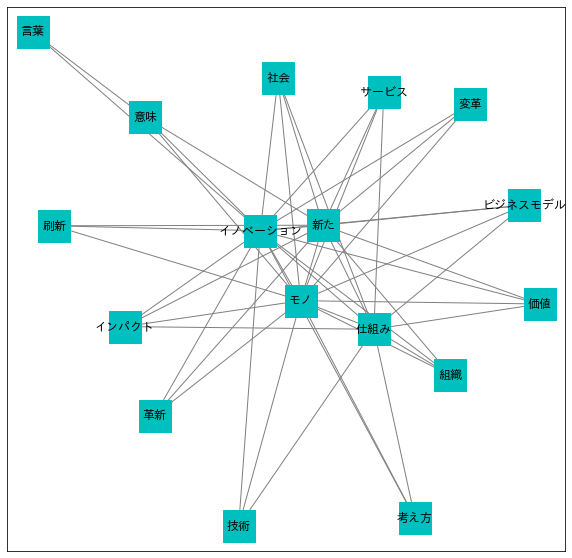

In [9]:
#
#　辞書の値（出現回数）でソート
# トップの５０を抽出
# reverse=True（降順）
#

tops = sorted(cnt_pairs2.items(), key=lambda x: x[1], reverse=True)[:50]

noun_1 = []; noun_2 = []; frequency = []

# データフレームの作成
for n,f in tops:
    noun_1.append(n[0])    
    noun_2.append(n[1])
    frequency.append(f)

df = pd.DataFrame({'前出名詞': noun_1, '後出名詞': noun_2, '出現頻度': frequency})

# 重み付きデータの設定
weighted_edges = np.array(df)

# グラフオブジェクトの生成
G = nx.Graph()
G.add_weighted_edges_from(weighted_edges)

# ノード
print('ノード：',nx.nodes(G))
# ノード数
print('ノード数：',nx.number_of_nodes(G))
        # ネットワーク図の描画
plt.figure(figsize=(10,10))
nx.draw_networkx(G,node_shape = "s",node_color = "c", node_size = 1000,edge_color = "gray", 
                 font_family = "IPAexGothic") 

plt.show()

In [10]:
#
# pygraphvizの使用
#

nx.nx_agraph.view_pygraphviz(G, prog='fdp')

('/var/folders/yc/twfvt0nn6lv5kf882s3vp6xh0000gn/T/tmppbofdxcf.png',
 <AGraph <Swig Object of type 'Agraph_t *' at 0x7ffec7557cc0>>)

In [11]:
###########################
#
#  　  WordCloud
#
###########################



In [12]:
m = MeCab.Tagger('-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd \
    -u /usr/local/lib/mecab/dic/userdic/add.dic')

exwords = ()

inPOSs=['名詞','英単語']

解析テキスト=F_text

#　データの前処理
解析テキスト = TM2.Webテキスト前処理3(解析テキスト,m,psw=False)[0]

# テキスト分析
result = TM2.テキスト分析(解析テキスト,exwords,inPOSs,m)
 
#print(result)
word_str=' '.join(result)
wc = WordCloud(background_color="white",
    font_path="/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc",
    width=800,height=600).generate(word_str)

plt.imshow(wc)
plt.axis('off')
plt.show()

キーワード： ['イノベーション', 'R&D', '技術', '開発', '研究'] 



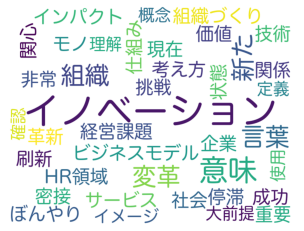

In [13]:
#
#
#  キーワードで抽出
#

m = MeCab.Tagger('-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd \
    -u /usr/local/lib/mecab/dic/userdic/add.dic')

exwords = ()

inPOSs=['名詞','英単語']

キーワード =ADict['イノベーション']
print('キーワード：',キーワード,'\n')

解析テキスト=F_text
解析文 = TM2.Webテキスト前処理3(解析テキスト,m,psw=False)[1]
# キーワードを含む文を抽出
抽出結果=TM2.keywordEx2(解析文,キーワード,psw=False)
抽出テキスト=抽出結果[0]

#　テキスト解析
result = TM2.テキスト分析(抽出テキスト,exwords,inPOSs,m)
 
#print(result)
word_str=' '.join(result)
wc = WordCloud(background_color="white",
    font_path="/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc",
    width=800,height=600).generate(word_str)

plt.imshow(wc)
plt.axis('off')
plt.show()